1. Importing Dependencies & Loading Dataset

In [167]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Loading Dataset
data=pd.read_csv("/content/sample_data/airbnb_dataset.csv",encoding_errors='ignore')


2. Initial Exploration

In [166]:
#Print top 5 rows
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228.0,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,20/12/15,0.03,1.0,0.0,0.0,No License,5,1,1,Not specified
1,45277537.0,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,01/05/23,0.24,139.0,364.0,2.0,No License,4.67,2,1,1
2,971000000000000000.0,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,18/12/23,1.67,1.0,343.0,6.0,Exempt,4.17,1,2,1
3,3857863.0,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,17/09/23,1.38,2.0,363.0,12.0,No License,4.64,1,1,1
4,40896611.0,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,03/12/23,0.24,133.0,335.0,3.0,No License,4.91,Studio,1,1


In [165]:
#Print last 5 rows
data.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
20765,24736896.0,Rental unit in New York · ★4.75 · 1 bedroom · ...,186680487,Henry D,Manhattan,Lower East Side,40.711380,-73.991560,Private room,45.0,...,29/09/23,1.81,1.0,157.0,12.0,No License,4.75,1,1,1
20766,2835711.0,Rental unit in New York · ★4.46 · 1 bedroom · ...,3237504,Aspen,Manhattan,Greenwich Village,40.730580,-74.000700,Entire home/apt,105.0,...,01/07/23,0.48,1.0,0.0,1.0,No License,4.46,1,2,1
20767,51825274.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,304317395,Jeff,Manhattan,Hell's Kitchen,40.757350,-73.993430,Entire home/apt,299.0,...,08/12/23,2.09,1.0,0.0,27.0,No License,4.93,1,1,1
20768,783000000000000000.0,Rental unit in New York · ★5.0 · 1 bedroom · 1...,163083101,Marissa,Manhattan,Chinatown,40.713750,-73.991470,Entire home/apt,115.0,...,17/09/23,0.91,1.0,363.0,7.0,No License,5,1,1,1
20769,566000000000000000.0,Rental unit in Queens · ★4.89 · 1 bedroom · 1 ...,93827372,Glenroy,Queens,Rosedale,40.658874,-73.728651,Private room,102.0,...,10/12/23,4.50,1.0,0.0,62.0,OSE-STRREG-0000513,4.89,1,1,1


In [164]:
#Print total Rows & Columns
data.shape

(20724, 22)

In [163]:
# Display concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20724 entries, 0 to 20769
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20724 non-null  object 
 1   name                            20724 non-null  object 
 2   host_id                         20724 non-null  object 
 3   host_name                       20724 non-null  object 
 4   neighbourhood_group             20724 non-null  object 
 5   neighbourhood                   20724 non-null  object 
 6   latitude                        20724 non-null  float64
 7   longitude                       20724 non-null  float64
 8   room_type                       20724 non-null  object 
 9   price                           20724 non-null  float64
 10  minimum_nights                  20724 non-null  float64
 11  number_of_reviews               20724 non-null  float64
 12  last_review                     20724

In [162]:
# Generate descriptive statistics for numeric columns (count, mean, std, min, quartiles, max)
data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000,20724.000000
mean,40.726843,-73.939155,187.732195,28.566396,42.592646,1.257529,18.840041,205.940938,10.844480,1.723412
std,0.060320,0.061442,1023.539393,33.560272,73.534712,1.905221,70.944874,135.101383,21.359681,1.211237
min,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,40.684150,-73.980760,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,40.722937,-73.949599,125.000000,30.000000,14.000000,0.650000,2.000000,214.000000,3.000000,1.000000
75%,40.763132,-73.917430,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


3. Data Cleaning

In [169]:
#Checking null values
data.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,7
latitude,7
longitude,7
room_type,7
price,34


In [161]:
#Dropping all null rows
data.dropna(inplace=True)

In [160]:
#Checking total Duplicate rows
data.duplicated().sum()

np.int64(0)

In [159]:
#printing all duplicate rows
data[data.duplicated()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths


In [157]:
#Dropping all duplicate rows
data.drop_duplicates(inplace=True)

In [156]:
#Checking Data type of Columns
data.dtypes

,0
id,object
name,object
host_id,object
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [155]:
#Changing the data-type of column 'id' to object
data['id']=data['id'].astype(object)

#Changing the data-type of column 'host_id' to object
data['host_id']=data['host_id'].astype(object)

4. Data Analysis

4.A. Univariate Analysis


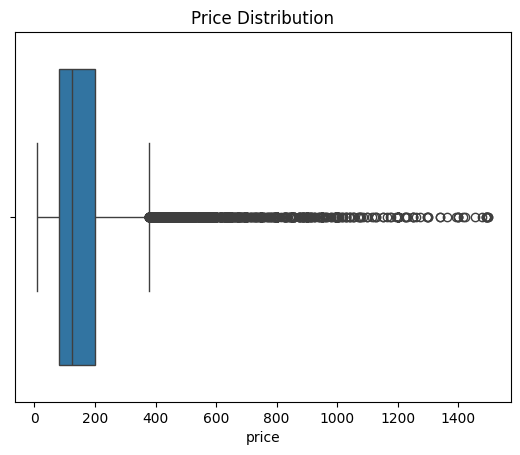

In [168]:
#new dataframe with price less than 1500 to remove price outliers
df=data[data['price']<1500]
#Boxplot of Price Distribution
plt.title('Price Distribution')
sns.boxplot(data=df,x='price')
plt.show()

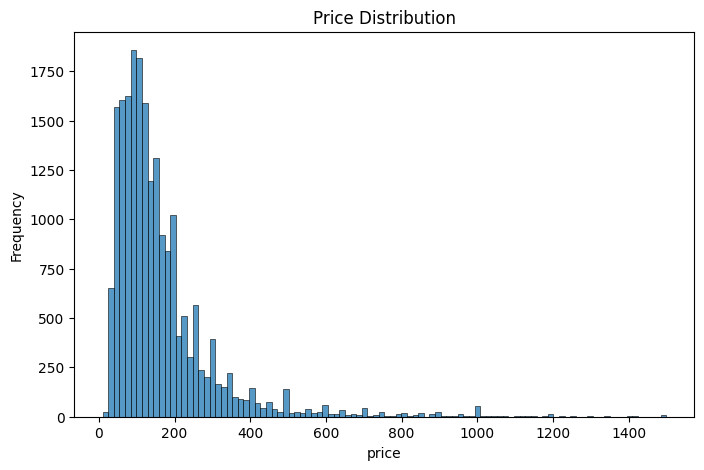

In [153]:
#Histogram of Price Distribution
plt.figure(figsize=(8,5))
plt.title('Price Distribution')
sns.histplot(data=df,x='price',bins=100)
plt.ylabel('Frequency')
plt.show()

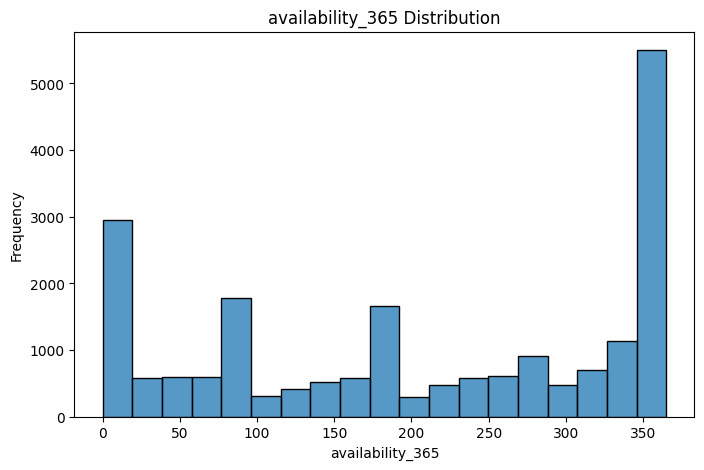

In [152]:
#Histogram of availability_365 Distribution
plt.figure(figsize=(8,5))
plt.title('availability_365 Distribution')
sns.histplot(data=df,x='availability_365')
plt.ylabel('Frequency')
plt.show()

In [151]:
#Average Price of each neighbourhood group
df.groupby(by='neighbourhood_group')['price'].mean()

,price
neighbourhood_group,
Bronx,107.990506
Brooklyn,155.138317
Manhattan,204.076470
Queens,121.681939
Staten Island,118.780069


4.B. Feature Engineering


In [ ]:
#Adding a new column named 'price per bed' to dataframe 'df'
df['price_per_bed']=df['price']/df['beds']


In [149]:
#Average Price per bed of each neighbourhood group
df.groupby(by='neighbourhood_group')['price_per_bed'].mean()

,price_per_bed
neighbourhood_group,
Bronx,74.713639
Brooklyn,99.788493
Manhattan,138.662489
Queens,76.336210
Staten Island,67.728101


4.C. Bivariate Analysis

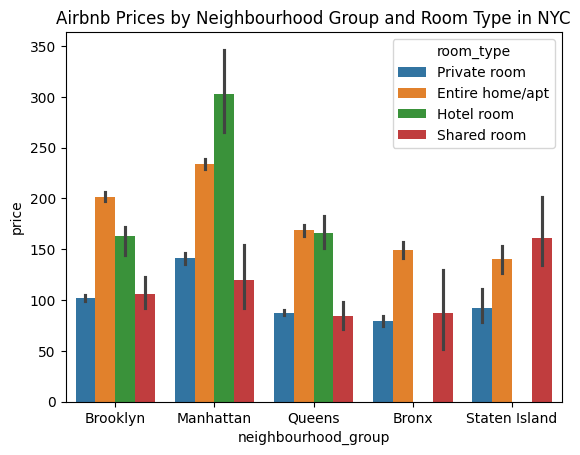

In [148]:
#Barplot of Airbnb Prices by Neighbourhood Group and Room Type in NYC
sns.barplot(data=df,x='neighbourhood_group',y='price',hue='room_type')
plt.title('Airbnb Prices by Neighbourhood Group and Room Type in NYC')
plt.show()



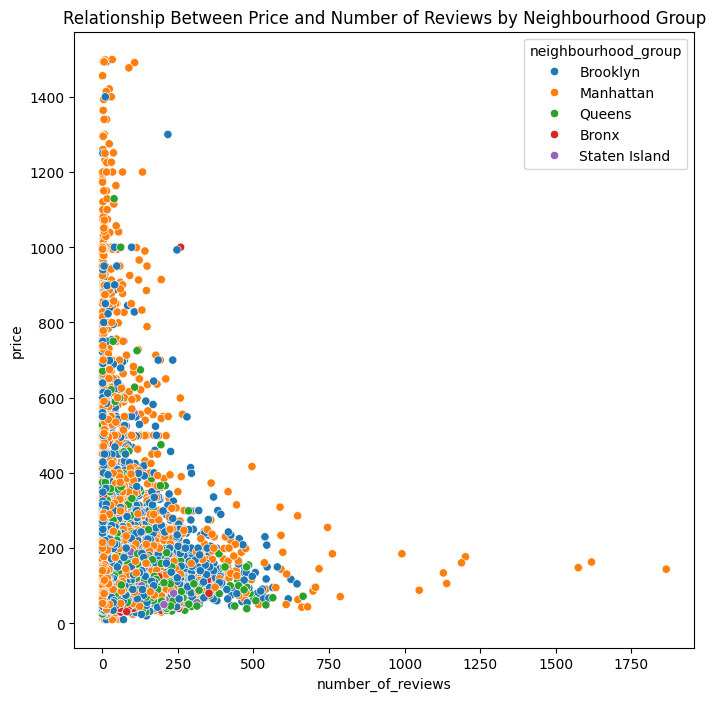

In [147]:
#Relationship Between Price and Number of Reviews by Neighbourhood Group
plt.figure(figsize=(8,8))
plt.title('Relationship Between Price and Number of Reviews by Neighbourhood Group')
sns.scatterplot(data=df,x='number_of_reviews',y='price', hue='neighbourhood_group')
plt.show()

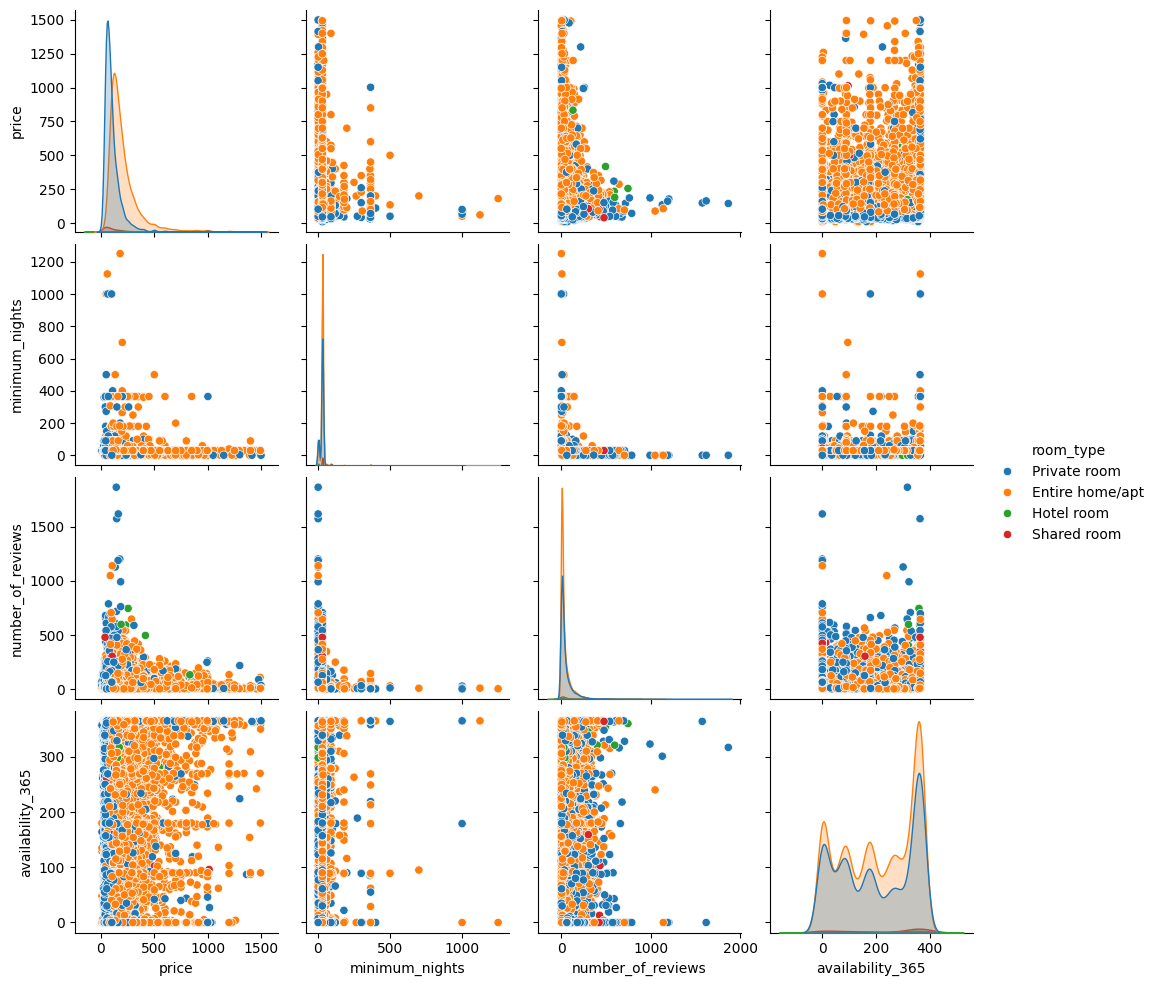

In [146]:
#Pairwise Relationships Between Listing Attributes by Room Type
sns.pairplot(data=df,vars=['price','minimum_nights','number_of_reviews','availability_365'], hue='room_type')
plt.show()

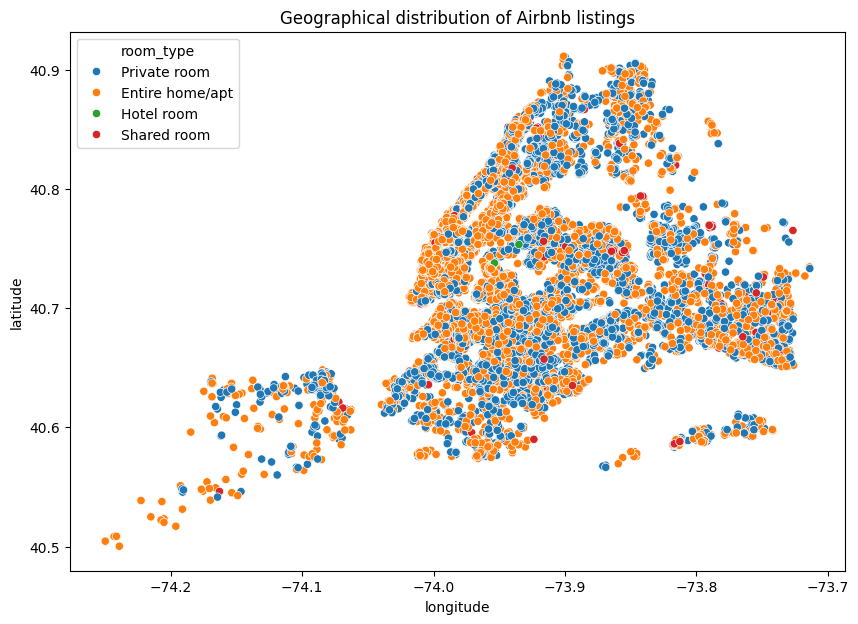

In [141]:
# Geographical distribution of Airbnb listings
plt.figure(figsize=(10,7))
plt.title('Geographical distribution of Airbnb listings')
sns.scatterplot(data=df,x='longitude',y='latitude',hue='room_type')
plt.show()

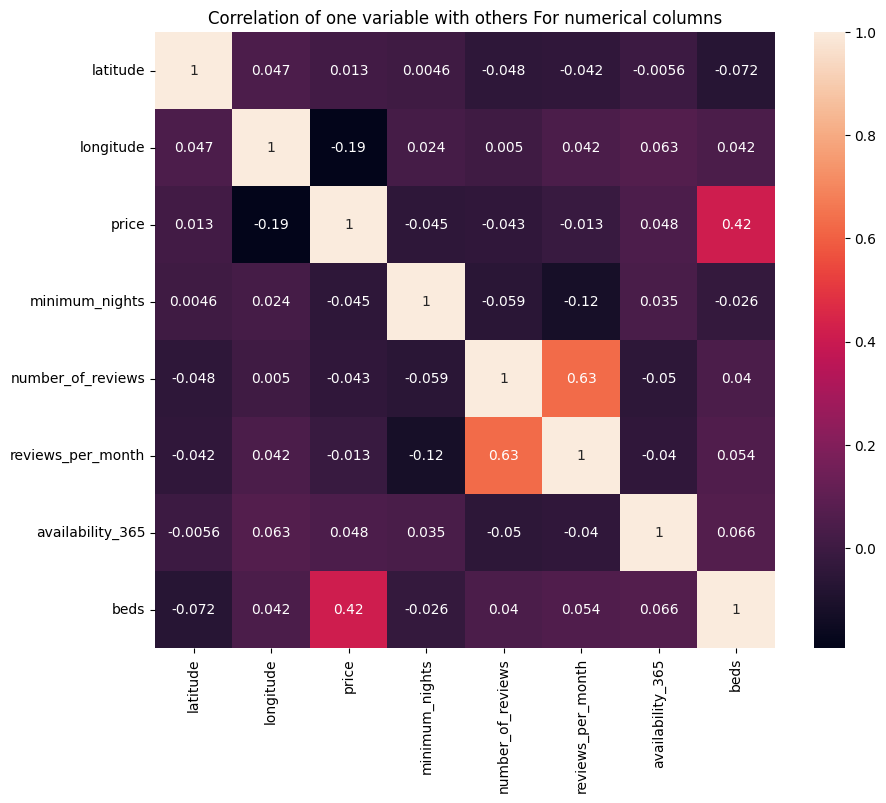

In [140]:
# Heat map-Correlation of one variable with others For numerical columns
corr=df[['latitude','longitude','price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','beds']].corr()
plt.figure(figsize=(10,8))
plt.title('Correlation of one variable with others For numerical columns')
sns.heatmap(data=corr,annot=True)
plt.show()
